In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k

###################################
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 1 # 0.5 for Half

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))


/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages

In [3]:
#matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [4]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os
import pyqrcode
import re
from collections import *
import this
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import seaborn as sn
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor
from keras.layers.merge import concatenate
from keras.layers import AveragePooling2D, Convolution2D, Dense, Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D 
from keras.models import Model, Sequential

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [5]:
# from tf.keras.models import Sequential  # This does not work!
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# CNN for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

This was developed using Python 3.6 (Anaconda) and package versions:

In [6]:
tf.__version__

'1.9.0'

In [7]:
tf.keras.__version__

'2.1.6-tf'

## Load Data

We will use a data-set consisting of 50000 reviews of movies from IMDB. Keras has a built-in function for downloading a similar data-set (but apparently half the size). However, Keras' version has already converted the text in the data-set to integer-tokens, which is a crucial part of working with natural languages that will also be demonstrated in this tutorial, so we download the actual text-data.

NOTE: The data-set is 84 MB and will be downloaded automatically.

In [8]:
#import imdb
relevant_path = "/data/danish/Data/IoT_Malware_Opcodes/benign_Sequences/"
print(relevant_path)

included_extentions = ['txt']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extentions)]
print(len(file_names))

X_train = []
y_train = []
wordCounter = {}
for fn in file_names:
    #file = open('/data/danish/Data/IoT_Malware_Opcodes/benign_Sequences/'+fn, 'r')
    with open('/data/danish/Data/IoT_Malware_Opcodes/benign_Sequences/'+fn,'r') as fh:
        for line in fh:
            # Replacing punctuation characters. Making the string to lower.
            # The split will spit the line into a list.
            word_list = line.replace(',','').replace('\'','').replace('.','').lower().split()
        for word in word_list:
              # Adding  the word into the wordCounter dictionary.
            if word not in wordCounter:
                wordCounter[word] = 1
            else:
                # if the word is already in the dictionary update its count.
                wordCounter[word] = wordCounter[word] + 1
    #print('{:15}{:3}'.format('Word','Count'))
    #print('-' * 25)
    
    # printing the words and its occurrence.
    #for  (word,occurance)  in wordCounter.items(): 
    #    print('{:15}{:3}'.format(word,occurance))

    data=' '.join('{}'.format(keys) for keys in wordCounter.keys())
    #data=' '.join('{}'.format(values) for values in wordCounter.values())

    X_train.append(data)
    y_train.append(0)
    
print(len(X_train))
print(len(y_train)) 



/data/danish/Data/IoT_Malware_Opcodes/benign_Sequences/
271
271
271


In [9]:
#import imdb
relevant_path = "/data/danish/Data/IoT_Malware_Opcodes/malicious_Sequences/"
print(relevant_path)

included_extentions = ['txt']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extentions)]
print(len(file_names))


for fn in file_names:
    #file = open('/data/danish/Data/IoT_Malware_Opcodes/malicious_Sequences/'+fn, 'r')
    with open('/data/danish/Data/IoT_Malware_Opcodes/malicious_Sequences/'+fn,'r') as fh:
        for line in fh:
            # Replacing punctuation characters. Making the string to lower.
            # The split will spit the line into a list.
            word_list = line.replace(',',' ').replace('\'','').replace('.','').lower().split()
        for word in word_list:
              # Adding  the word into the wordCounter dictionary.
            if word not in wordCounter:
                wordCounter[word] = 1
            else:
                # if the word is already in the dictionary update its count.
                wordCounter[word] = wordCounter[word] + 1
    #print('{:15}{:3}'.format('Word','Count'))
    #print('-' * 25)
    
    # printing the words and its occurrence.
    #for  (word,occurance)  in wordCounter.items(): 
    #    print('{:15}{:3}'.format(word,occurance))

    data=' '.join('{}'.format(keys) for keys in wordCounter.keys())
    #data=' '.join('{}'.format(values) for values in wordCounter.values())

    X_train.append(data)
    y_train.append(1)
    
    
print(len(X_train))
print(len(y_train)) 

/data/danish/Data/IoT_Malware_Opcodes/malicious_Sequences/
280
551
551


In [10]:
x_train_text, x_test_text, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [11]:
print(len(x_train_text))
print(len(y_train)) 
print(len(x_test_text))
print(len(y_test)) 

495
495
56
56


In [12]:
print("Train-set size: ", len(x_train_text))
print("Test-set size:  ", len(x_test_text))


Train-set size:  495
Test-set size:   56


In [13]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [14]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [15]:
data_text = x_train_text + x_test_text

Print an example from the training-set to see that the data looks correct.

The true "class" is a sentiment of the movie-review. It is a value of 0.0 for a negative sentiment and 1.0 for a positive sentiment. In this case the review is positive.

## Tokenizer

A neural network cannot work directly on text-strings so we must convert it somehow. There are two steps in this conversion, the first step is called the "tokenizer" which converts words to integers and is done on the data-set before it is input to the neural network. The second step is an integrated part of the neural network itself and is called the "embedding"-layer, which is described further below.

We may instruct the tokenizer to only use e.g. the 10000 most popular words from the data-set.

In [16]:
num_words = None

In [17]:
tokenizer = Tokenizer(num_words=num_words)
#tokenizer_1 = Tokenizer(2000)

The tokenizer can then be "fitted" to the data-set. This scans through all the text and strips it from unwanted characters such as punctuation, and also converts it to lower-case characters. The tokenizer then builds a vocabulary of all unique words along with various data-structures for accessing the data.

Note that we fit the tokenizer on the entire data-set so it gathers words from both the training- and test-data. This is OK as we are merely building a vocabulary and want it to be as complete as possible. The actual neural network will of course only be trained on the training-set.

In [18]:
#sample_text = data_text[:10]#"This movie describes the life of somebody who grew up in the worst of circumstances but unlike many people he actually grew up to be a respectable person. Whats more is that this is a true story.<br /><br />Antwone Fisher is so innocent and yet he was abused such just because he was not white. Antwone Fisher has been married to the same women for ten years and he never fooled around with women, coke, cigars, weed, alcohol, or any of those things that are very popular in the places he was growing up. <br /><br />There is not much more to say about this movie it is excellent. The only rating I can give it is a 10/10."
#tokenizer_1.fit_on_texts(sample_text)
import time

tokenizer.fit_on_texts(data_text)

In [19]:
len(data_text)

551

If you want to use the entire vocabulary then set `num_words=None` above, and then it will automatically be set to the vocabulary-size here. (This is because of Keras' somewhat awkward implementation.)

In [20]:
if num_words is None:
    num_words = len(tokenizer.word_index)


In [21]:
num_words

658

In [22]:
%%time
x_train_tokens = tokenizer.texts_to_sequences(x_train_text)

CPU times: user 170 ms, sys: 8.11 ms, total: 178 ms
Wall time: 177 ms


In [23]:
#x_train_tokens[1]

For example, here is a text from the training-set:

In [24]:
#x_train_text[1]

This text corresponds to the following list of tokens:

In [25]:
#x_train_tokens[1]
#np.array(x_train_tokens[1])

We also need to convert the texts in the test-set to tokens.

In [26]:
%%time
x_test_tokens = tokenizer.texts_to_sequences(x_test_text)

CPU times: user 21 ms, sys: 56 µs, total: 21 ms
Wall time: 20.6 ms


In [27]:
#x_test_tokens[0]

## Padding and Truncating Data

The Recurrent Neural Network can take sequences of arbitrary length as input, but in order to use a whole batch of data, the sequences need to have the same length. There are two ways of achieving this: (A) Either we ensure that all sequences in the entire data-set have the same length, or (B) we write a custom data-generator that ensures the sequences have the same length within each batch.

Solution (A) is simpler but if we use the length of the longest sequence in the data-set, then we are wasting a lot of memory. This is particularly important for larger data-sets.

So in order to make a compromise, we will use a sequence-length that covers most sequences in the data-set, and we will then truncate longer sequences and pad shorter sequences.

First we count the number of tokens in all the sequences in the data-set.

In [28]:
%%time
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)
num_tokens

CPU times: user 301 µs, sys: 0 ns, total: 301 µs
Wall time: 311 µs


array([624, 551, 431, 456, 640, 662, 576, 603, 616, 665, 624, 327, 660,
       549, 511, 660, 616, 446, 647, 553, 504, 625, 644, 508, 458, 623,
       445, 526, 548, 441, 660, 440, 640, 508, 536, 659, 665, 369, 542,
       648, 190, 328, 660, 355, 624, 660, 491, 452, 465, 640, 549, 542,
       514, 626, 352, 626, 647, 542, 332, 622, 374, 431, 510, 396, 457,
       532, 622, 546, 647, 550, 666, 628, 662, 510, 615, 659, 620, 528,
       628, 443, 542, 576, 602, 603, 485, 627, 660, 549, 515, 625, 623,
       647, 626, 549, 550, 576, 546, 644, 352, 625, 432, 625, 624, 625,
       646, 589, 647, 649, 355, 583, 388, 646, 628, 551, 542, 616, 510,
       487, 637, 625, 514, 365, 464, 538, 514, 647, 646, 432, 646, 355,
       337, 592, 441, 624, 575, 646, 576, 644, 603, 457, 519, 647, 457,
       355, 575, 644, 647, 319, 464, 395, 628, 622, 335, 406, 613, 628,
       233, 659, 660, 440, 536, 660, 464, 624, 591, 355, 549, 616, 355,
       326, 524, 429, 464, 372, 510, 660, 465, 660, 464, 589, 53

The average number of tokens in a sequence is:

In [29]:
np.mean(num_tokens)

552.8221415607985

The maximum number of tokens in a sequence is:

In [30]:
np.max(num_tokens)

666

The max number of tokens we will allow is set to the average plus 2 standard deviations.

In [31]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

742

This covers about 95% of the data-set.

In [32]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

1.0

When padding or truncating the sequences that have a different length, we need to determine if we want to do this padding or truncating 'pre' or 'post'. If a sequence is truncated, it means that a part of the sequence is simply thrown away. If a sequence is padded, it means that zeros are added to the sequence.

So the choice of 'pre' or 'post' can be important because it determines whether we throw away the first or last part of a sequence when truncating, and it determines whether we add zeros to the beginning or end of the sequence when padding. This may confuse the Recurrent Neural Network.

In [33]:
pad = 'pre'

In [34]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [35]:
%%time
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

CPU times: user 5.08 ms, sys: 0 ns, total: 5.08 ms
Wall time: 4.72 ms


We have now transformed the training-set into one big matrix of integers (tokens) with this shape:

In [36]:
x_train_pad.shape

(495, 742)

The matrix for the test-set has the same shape:

In [37]:
x_test_pad.shape

(56, 742)

For example, we had the following sequence of tokens above:

In [38]:
np.array(x_train_tokens[1])

array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,   2,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

This has simply been padded to create the following sequence. Note that when this is input to the Recurrent Neural Network, then it first inputs a lot of zeros. If we had padded 'post' then it would input the integer-tokens first and then a lot of zeros. This may confuse the Recurrent Neural Network.

In [39]:
x_train_pad[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Tokenizer Inverse Map

For some strange reason, the Keras implementation of a tokenizer does not seem to have the inverse mapping from integer-tokens back to words, which is needed to reconstruct text-strings from lists of tokens. So we make that mapping here.

In [40]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

Helper-function for converting a list of tokens back to a string of words.

In [41]:
def tokens_to_string(tokens):
    # Map from tokens back to words.
    words = [inverse_map[token] for token in tokens if token != 0]
    
    # Concatenate all words.
    text = " ".join(words)

    return text

In [43]:
from keras.layers import CuDNNGRU

model = Sequential()

embedding_size = 10
model.add(Embedding(input_dim=num_words,
                        output_dim=embedding_size,
                        input_length=max_tokens,
                        name='layer_embedding_RNN'))

    

model.add(CuDNNGRU(units=32))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(x_train_pad,y_train, validation_data=(x_test_pad,y_test), epochs=50, batch_size=128)
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding_RNN (Embeddi (None, 742, 10)           6580      
_________________________________________________________________
cu_dnngru_2 (CuDNNGRU)       (None, 32)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 10,870
Trainable params: 10,870
Non-trainable params: 0
_________________________________________________________________
Train on 495 samples, validate on 56 samples
Epoch 1/50
495/495 [==============================] - 2s 5ms/step - loss: 0.6935 - acc: 0.5192 - val_loss: 0.6909 - val_acc: 0.6607
Epoch 2/50
495/495 [==============================] - 0s 419us/step - loss: 0.6879 - acc: 0.6182 - val_loss: 0.6878 - val_acc: 0.4821
Epoch 3/50
495/495 [==============================] - 0s 398us/step - loss: 0.6806 - acc: 0

In [44]:
%%time
result = model.evaluate(x_test_pad, y_test)

56/56 [==============================] - 0s 683us/step
CPU times: user 42.1 ms, sys: 4.32 ms, total: 46.4 ms
Wall time: 39.6 ms


In [45]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 98.21%


In [46]:
#####################################
# write Traning History to a file
output = open('RNN_History.pkl', 'wb')
pickle.dump(history.history, output)
output.close()
#####################################

In [47]:

# read Traning History back from the file
pkl_file = open('RNN_History.pkl', 'rb')
history = pickle.load(pkl_file)
pkl_file.close()

In [48]:
def plot_history(history):
    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]
    plt.figure(figsize = (25,7))
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history[l], 'b', label='Training loss (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'g', label='Testing loss (' + str(str(format(history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('_Graph#######LOSS.png', bbox_inches='tight')
    
    
    ## Accuracy
    plt.figure(figsize = (25,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history[l], 'b', label='Training accuracy (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'g', label='Testing accuracy (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('_Graph#######ACC.png', bbox_inches='tight')
    plt.show()

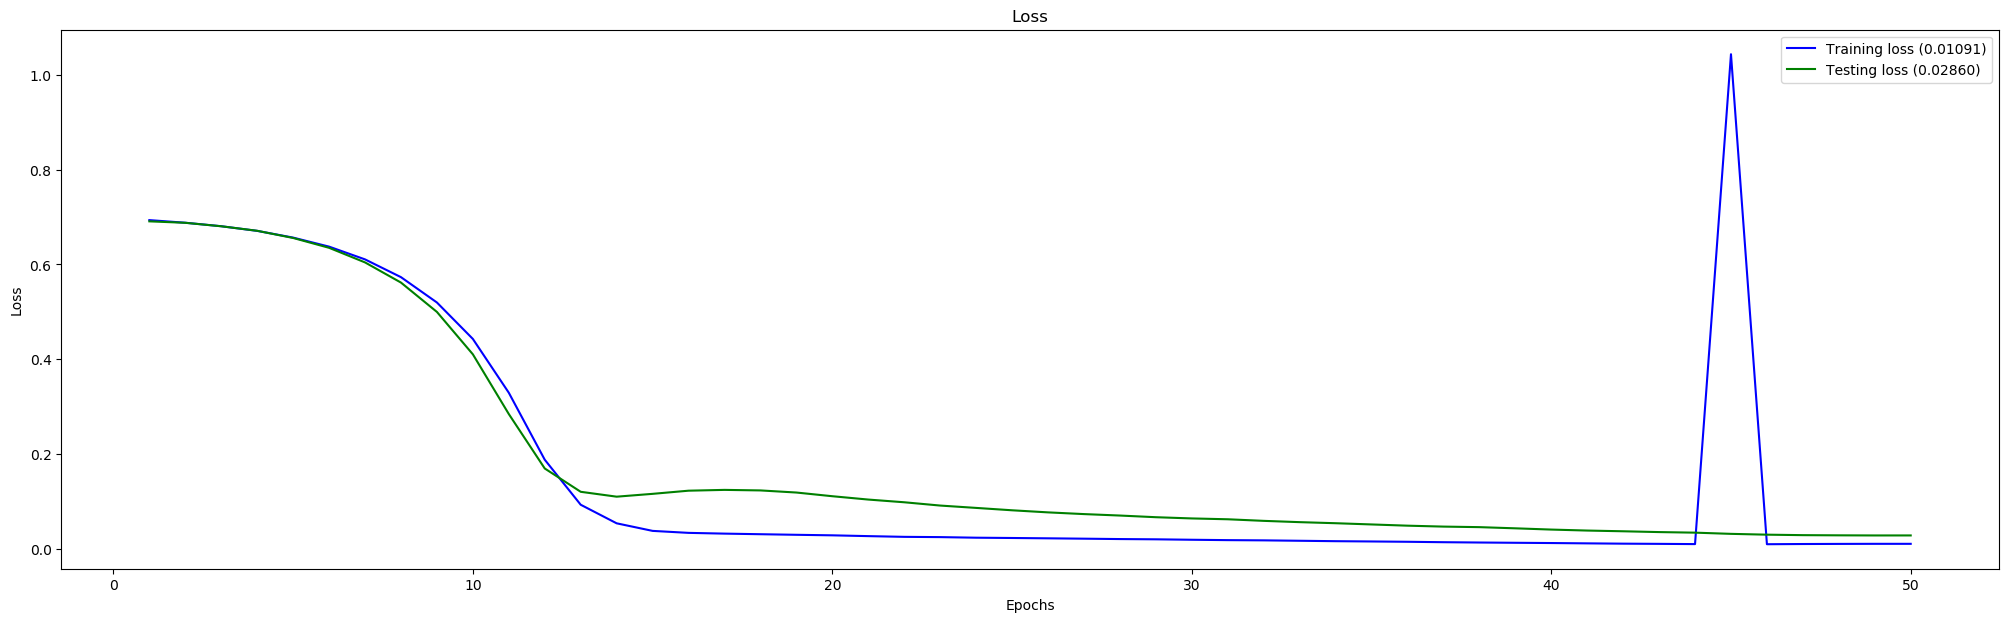

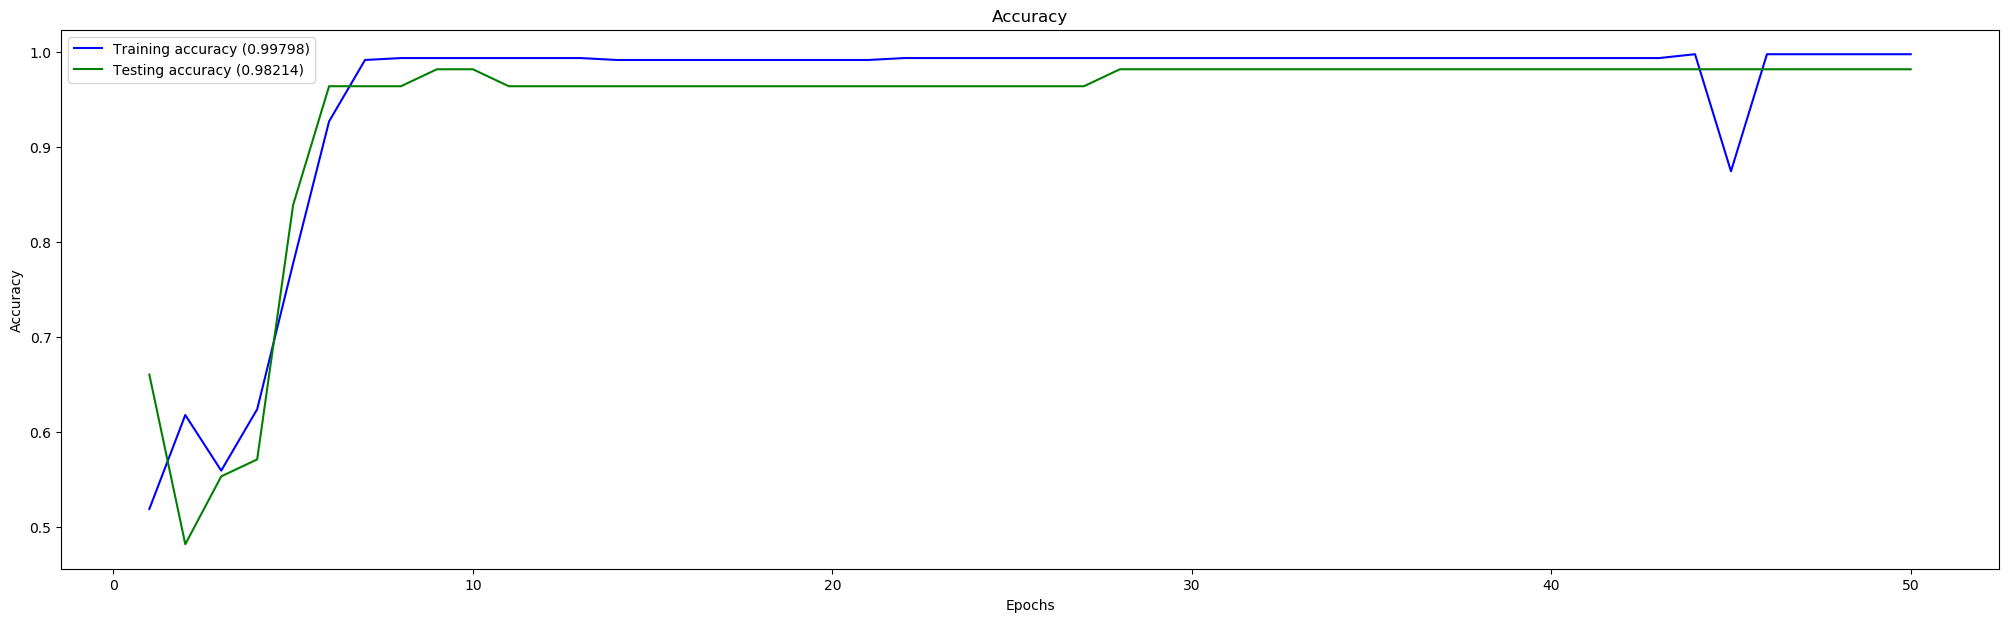

In [49]:
plot_history(history)

In [50]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 98.21%


In [51]:
%%time
y_pred = model.predict(x=x_test_pad)
#y_pred = y_pred.T[0]

CPU times: user 105 ms, sys: 15.2 ms, total: 120 ms
Wall time: 117 ms


In [52]:
y_test = np.argmax(y_test, axis=1)
y_test

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

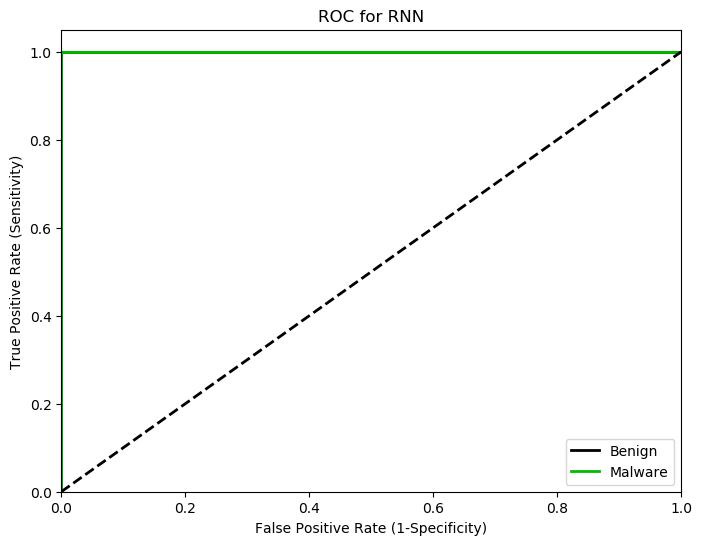

In [53]:
import scikitplot as skplt
import matplotlib.pyplot as plt


y_true = y_test# ground truth labels
y_probas = y_pred# predicted probabilities generated by sklearn classifier

list_fams = ['Benign','Malware']
figsize=(8,6)
title = "ROC for RNN"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_test, y_pred,ax=ax, plot_macro=False, plot_micro=False )

ax.set_title(title, fontsize=title_fontsize)
#ax.get_legend().remove()
ax.legend(list_fams)
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.savefig("ROC for RNN.png")
plt.show()

In [54]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [55]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history) 

csv_file = 'RNN-History.csv'
with open(csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [56]:
from pycm import ConfusionMatrix

CM_1DCNN = ConfusionMatrix(y_test,y_pred)
CM_1DCNN.save_csv("CM_RNN",address=True)

{'Status': True,
 'Message': '/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IoT-Ensemble/RNN/CM_RNN.csv'}

In [57]:
print(CM_1DCNN)

Predict  0        1        
Actual
0        32       0        

1        1        23       





Overall Statistics : 

95% CI                                                            (0.94746,1.01683)
ACC Macro                                                         0.98214
AUNP                                                              0.97917
AUNU                                                              0.97917
Bennett S                                                         0.96429
CBA                                                               0.96402
Chi-Squared                                                       52.0404
Chi-Squared DF                                                    1
Conditional Entropy                                               0.10709
Cramer V                                                          0.964
Cross Entropy                                                     0.98617
F1 Macro                                                        

In [58]:
model.save("RNN.h5")

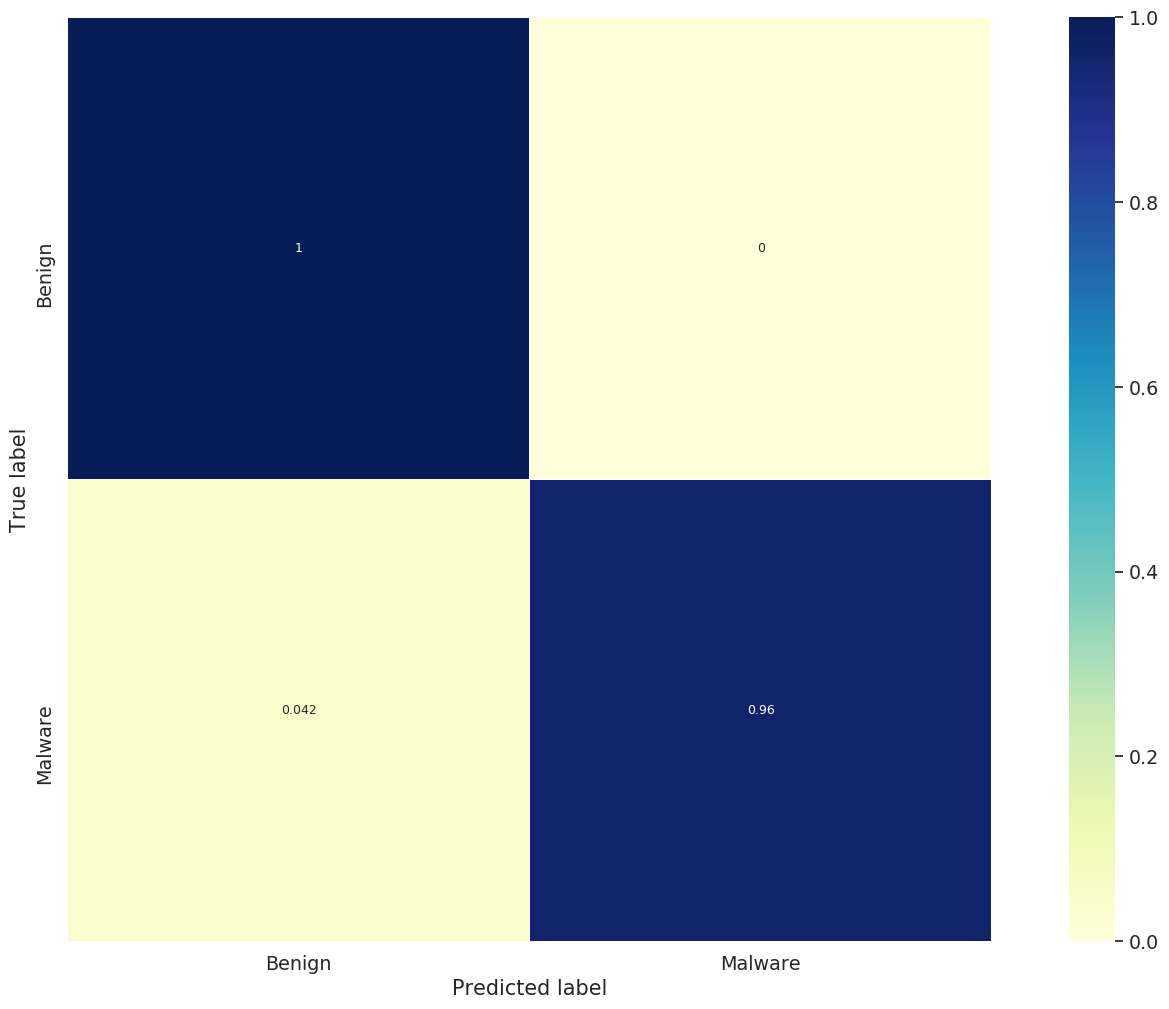

In [59]:
import seaborn as sns

def plot_confusion_matrix():
    
    list_fams=['Benign','Malware']
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    figure = plt.gcf()
    figure.set_size_inches(20, 12)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cmap= "YlGnBu" ,cbar=True, annot=True, square=True,
                 annot_kws={'size': 9}, linewidth = 0.01,
                 yticklabels=list_fams, xticklabels=list_fams)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('RNN-Matrix.png', bbox_inches='tight')
    plt.show()
    
plot_confusion_matrix()

In [60]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

print("weighted")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

weighted
Precision:  [0.96969697 1.        ]
Recall:  [1.         0.95833333]
F1 score:  [0.98461538 0.9787234 ]
CPU times: user 5.13 ms, sys: 63 µs, total: 5.2 ms
Wall time: 4 ms
